### Fortegnstest - Introduksjon

Fortegnstesten er en ikke-parametrisk statistisk test som brukes for å vurdere om medianen av en populasjon avviker fra en spesifisert verdi. Den er spesielt nyttig når du ikke kan anta normalfordeling av dataene. Her vil vi demonstrere bruken av en fortegnstest for å undersøke om medianen av et datasett avviker fra null.


In [29]:
# Importerer nødvendige biblioteker
import numpy as np
from scipy.stats import binom

# Genererer et datasett
np.random.seed(0)  # For reproduserbarhet
data = np.random.normal(loc=0.5, scale=1, size=30)  # Data generert fra en normalfordeling


### Visualisering av data

Før vi utfører fortegnstesten, kan det være nyttig å visualisere dataene for å få en intuitiv forståelse av fordelingen.


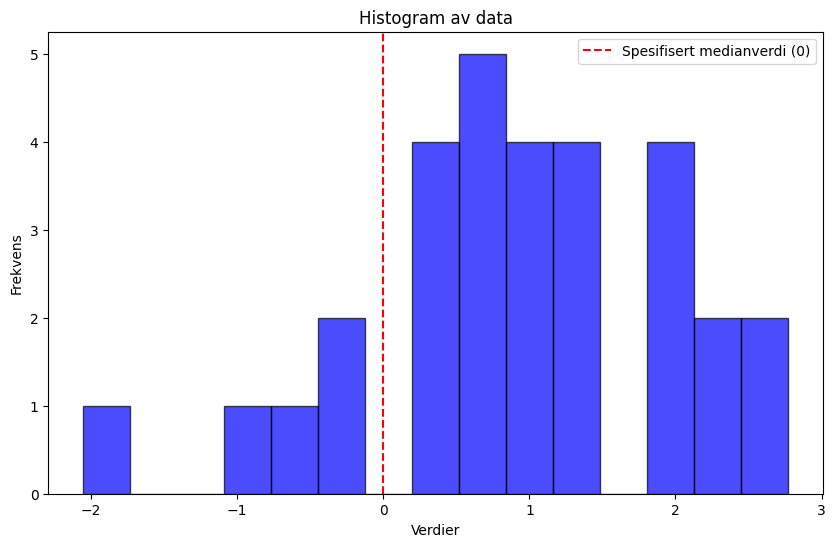

In [30]:
# Importerer nødvendige biblioteker for visualisering
import matplotlib.pyplot as plt

# Plotter dataene
plt.figure(figsize=(10, 6))
plt.hist(data, bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='Spesifisert medianverdi (0)')
plt.xlabel('Verdier')
plt.ylabel('Frekvens')
plt.title('Histogram av data')
plt.legend()
plt.show()


### Utføring av fortegnstest

For å utføre fortegnstesten, teller vi antall verdier som er større enn null (spesifisert medianverdi) og sammenligner dette med hva vi ville forvente under nullhypotesen om at medianen er null.


In [25]:
# Utfører fortegnstest
n = len(data)
antall_positiv = np.sum(data > 0)  # Antall verdier større enn null

# Nullhypotese: median = 0 (sannsynligheten for positivt resultat er 0.5 under H0)
p = 0.5
alpha = 0.05

# Beregner kritisk verdi
k = binom.ppf(1 - alpha, n, p)

# P-verdi for testen
p_verdi = 1 - binom.cdf(antall_positiv - 1, n, p)

# Skriver ut resultatene
print(f'Antall positive observasjoner: {antall_positiv}')
print(f'Kritisk verdi: {k}')
print(f'P-verdi: {p_verdi:.4f}')


Antall positive observasjoner: 25
Kritisk verdi: 19.0
P-verdi: 0.0002


### Konklusjon

Basert på antallet positive observasjoner og den beregnede P-verdien, kan vi avgjøre om vi skal forkaste nullhypotesen. Forkaster vi nullhypotesen, antyder det at medianen av populasjonen avviker signifikant fra null. Resultatene må tolkes i sammenheng med den spesifikke konteksten og signifikansnivået.


### STACK 11 - Oppgave 3

In [3]:
# Importerer nødvendige biblioteker
import numpy as np
from scipy.stats import norm, binom

# Definerer dataene
data = np.array([-0.26, -0.02, 1.47, 1.52, 1.21, -0.87, 1.62, 0.0, 1.2, -0.93, -1.3, 0.05, 0.76, 1.78, 1.27])
n = len(data)
mu_0 = 0
sigma = 1
alpha = 0.05
mu_1 = 0.84


### (a) Observert verdi av testobservatoren

For å beregne den observerte verdien av testobservatoren, bruker vi formelen:
$$\frac{\bar{X} - \mu_0}{\sigma/\sqrt{n}}$$
hvor $\bar{X}$ er utvalgsgjennomsnittet.


In [4]:
# Beregning av testobservatoren
x_bar = data.mean()
test_statistic = (x_bar - mu_0) / (sigma / np.sqrt(n))
test_statistic


1.9364916731037087

### (b) Testens kritiske verdi

Kritisk verdi kan finnes ved å bruke den øvre tailen av standard normalfordelingen, siden vi tester $\mu > 0$.


In [5]:
# Beregning av kritisk verdi
critical_value = norm.ppf(1 - alpha)
critical_value


1.644853626951472

### (c) P-verdien til testen

P-verdien beregnes ved å finne sannsynligheten for å observere en verdi like ekstrem eller mer ekstrem enn den observerte teststatistikken.


In [6]:
# Beregning av p-verdien
p_value = 1 - norm.cdf(test_statistic)
p_value


0.026403755708056753

### (d) Numerisk verdi av teststyrken

Teststyrken, $1 - \beta$, beregnes ved å finne sannsynligheten for å forkaste $H_0$ gitt at den reelle $\mu = 0.84$.


In [7]:
# Beregning av teststyrken
power = 1 - norm.cdf(critical_value, loc=mu_1, scale=sigma/np.sqrt(n))
power


0.0009129357222683598

### (e) Observert verdi av fortegnstestobservatoren

Fortegnstestobservatoren $U$ er antall positive verdier i datasettet.


In [19]:
# Beregning av U
U = np.sum(data > 0)
U


9

### (f) Kritisk verdi for fortegnstesten

For å finne den kritiske verdien for fortegnstesten, bruker vi binomisk fordeling.


In [22]:
# Beregning av kritisk verdi for fortegnstesten
k = binom.ppf(1 - alpha, n, 0.5)
k + 1


12.0

### (g) Fortegntestens p-verdi

P-verdien for fortegnstesten beregnes ved å finne sannsynligheten for å observere $U$ eller flere strengt positive verdier under nullhypotesen.


In [10]:
# Beregning av p-verdien for fortegnstesten
p_value_sign_test = 1 - binom.cdf(U - 1, n, 0.5)
p_value_sign_test


0.303619384765625

### (h) Numerisk verdi av teststyrken for fortegnstesten

Teststyrken for fortegnstesten under forutsetningen $\mu=0.84$ kan beregnes ved å finne sannsynligheten for at $X_i > 0$ når $\mu = 0.84$ og deretter bruke denne i en binomisk fordeling for å beregne sannsynligheten for å forkaste $H_0$.


In [11]:
# Beregning av teststyrken for fortegnstesten
prob_greater_than_zero = norm.cdf(-mu_1 / sigma)
power_sign_test = 1 - binom.cdf(k - 1, n, prob_greater_than_zero)
power_sign_test


1.2750683210827063e-05